## EXERCISES_RLAB03

#### REZA RAJAEE (2040483)

## Exercise 1
#### • The triangular distribution, in the interval $(a, b)$, is given by the following:
$$
 f(x)=\begin{cases}
\frac{2(x-a)}{(b-a)(c-a)} & a≤x<c \\
\frac{2(b-x)}{(b-a)(b-c)} & c≤x≤b \\
0 & \text{otherwise} \\
\end{cases}
$$
#### where $c ∈ [a, b]$.
#### a) plot the function, given the interval (a, b)

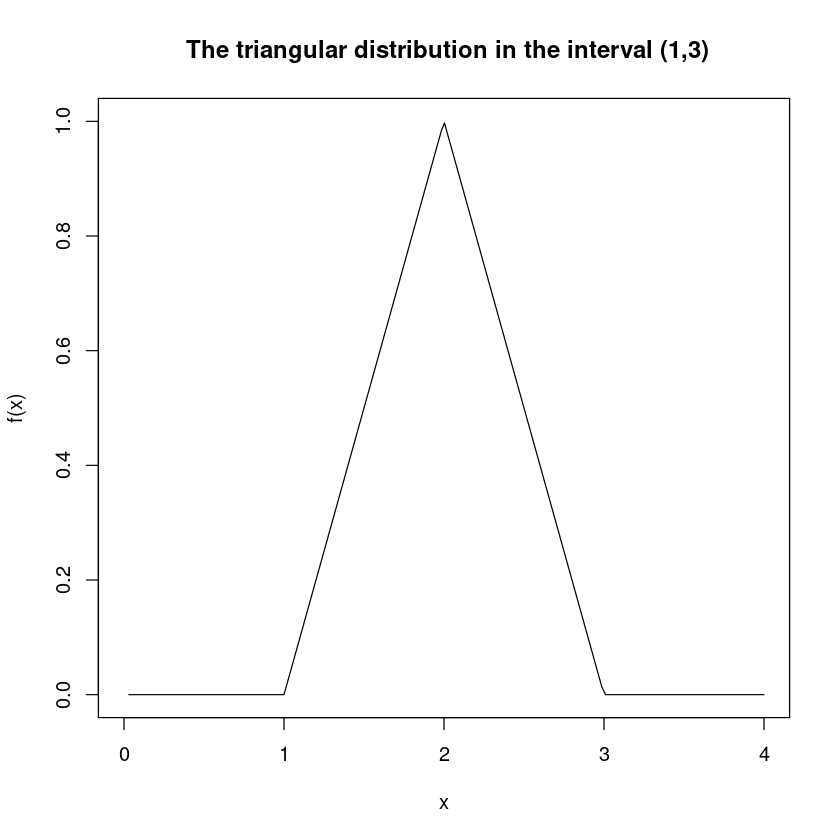

In [8]:
a <- 1; b <- 3; c <- 2   ## initialize a,b,c 

## for the integrating in the next part we need to seprate function in to part

fp_tD <- function (x){  ## first part of the function, a≤x<c
        fp <- (2*(x-a))/((b-a)*(c-a))
        return (fp)
    }
    
sp_tD <- function (x){ ## second part of the function, c≤x≤b   
        sp <- (2*(b-x))/((b-a)*(b-c))
        return (sp)
    }
    
tD <- function (x){  ## The triangular distribution
    if (a<=x & x<c){
        return(fp_tD(x))
    }
    if (c<=x & x<=b){
        return (sp_tD(x))
    }
    else {
        return (0) 
    }    
}  


x<-sort(runif(150,0,4)) ## rnage x 

y<-c()
for (i in 1:150){
    y[i] <- tD(x[i]) ## f(x) of our x range
}

plot(x,y, type='l',ylab='f(x)',xlim=c(0,4),ylim=c(0,1),
    main = sprintf (" The triangular distribution in the interval (1,3)"))

#### b) and write an algorithm to generate random numbers from the triangular distribution

In [4]:
options(warn=-1)

In [6]:
## The Cumulative Distribution Function (CDF) 

cdf <- function(x){
    if (x<=a){
        return(0)
    }
    if (a<=x & x<c){
        return(integrate(fp_tD,a,x)$value) ## first part
    }
    if (c<=x & x<=b){
        return(integrate(fp_tD,a,c)$value +integrate(sp_tD,c,x)$value) ## second part
    }
    if (x>b){
        return(1)
    }
}

## The Quantile Function (the inverse CDF) (finding nuber with especial probability)

library('GoFKernel') ## for using inverse

qf <- function(p){
    i_cdf <- inverse(cdf, lower = a, upper = b) ## CDF  is monotone increasing functions in the interval [1,2]
   return(i_cdf(p))
}

## The Function to Generate Random variable having F(x) distribution

rf <- function(n){
    num <- c()
    p <- runif(n,0,1) ## generate random number between [0,1] (probability)
    for (i in 1:n){
         num[i] <- qf(p[i])  ## using qf functiom (inverse of CDF) to find the number 
    }
   return (num)    
}

#### c) generate $ 10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

In [7]:
sam <- rf(10000)  ### generat 10000 sample

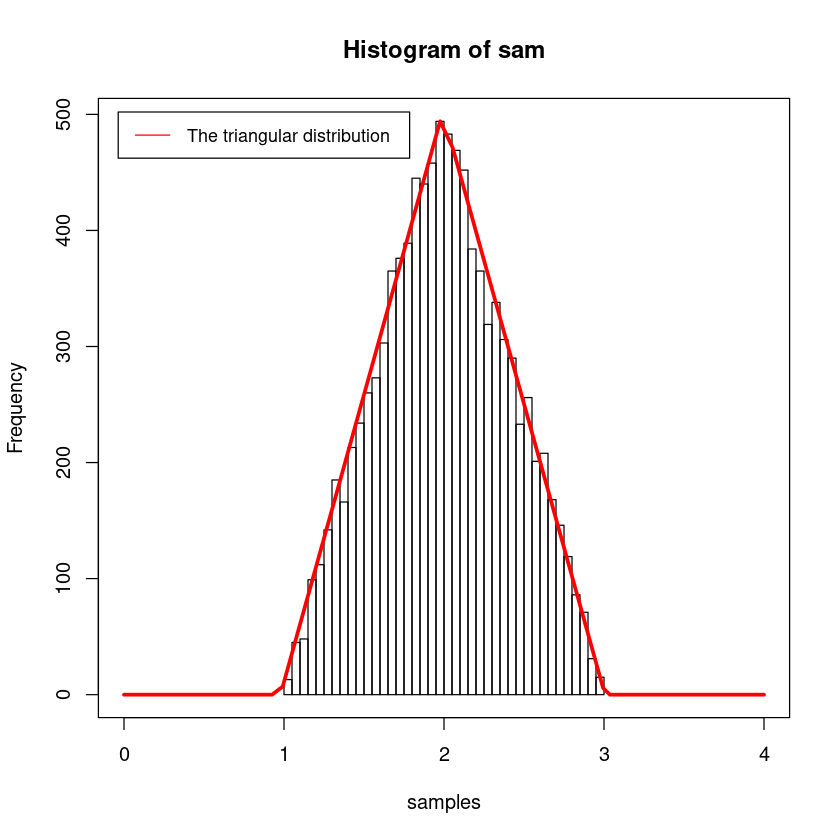

In [20]:
hist_sam <- hist(sam,breaks =50,xlim=range(0,4), xlab='samples')

par(new=TRUE)

x<-sort(runif(150,0,4)) ## rnage x 

y<-c()
for (i in 1:150){
    y[i] <- tD(x[i]) ## f(x) of our x range
}

plot(x,y, type='l',xlab='',ylab='',lwd=3, col ='red',xaxt="n",yaxt="n")
legend(0,1,c('The triangular distribution'), col=c('red'),lty=1,cex=0.9)

## Exercise 2 - Markov’s inequality
#### • Markov’s inequality represents an upper bound to probability distributions:
$$
P(X ≥ k) ≤ \frac{E[X]}{k} $$
#### for k>0
#### • having defined a function
$$
G(k) = 1 − F(k) ≡ P(X ≥ k)
$$
#### plot G(k) and the Markov’s upper bound for
####  a) the exponential, Exp(λ = 1), distribution function

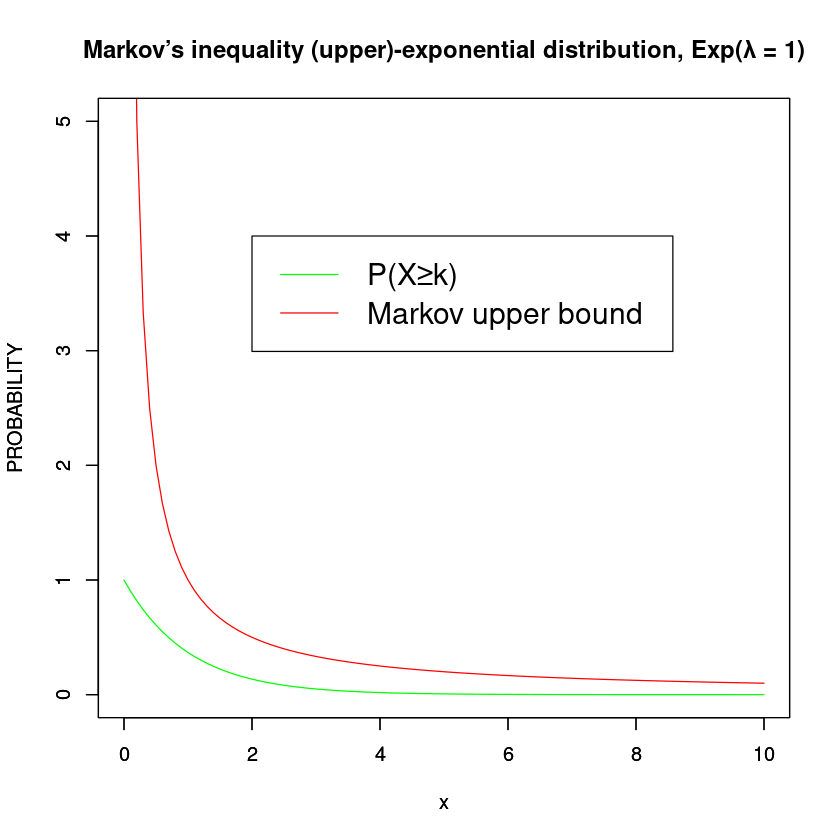

In [25]:
lamda <- 1   
E <- 1/lamda  ## E[X]= 1/λ 

Mar_upper_bound <- function(k){
    return(E/k)  ## upper bound for: P(X≥k) =  1- P(k≤X)
}

first_inequality <- function(k){ ## P(X≥k) =  1- P(k≤X)
    return(1-pexp(k,rate=lamda)) 
}


plot(Mar_upper_bound, type="l", col="red", lty=1, xlim=c(0,10),ylim=c(0,5),ylab="PROBABILITY" )
par(new=TRUE)
plot(first_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(0,5), ylab="PROBABILITY",
     main = sprintf ("Markov’s inequality (upper)-exponential distribution, Exp(λ = 1)"))
legend(2,4,c('P(X≥k)','Markov upper bound'), col=c('green','red'),lty=1,cex=1.5)

#### b) the uniform, U(3, 5), distribution function

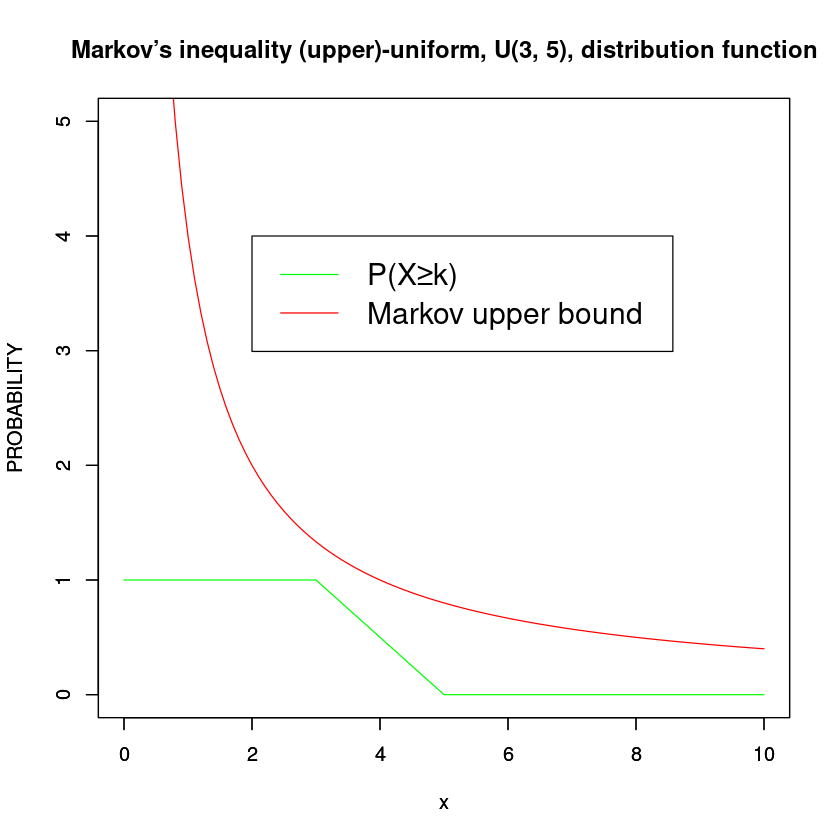

In [24]:
a <- 3
b <- 5
E <- (a+b)/2  ## E[X]= (a+b)/2  

Mar_upper_bound <- function(k){
    return(E/k)  ## upper bound for: P(X≥k) =  1- P(k≤X)
}

first_inequality <- function(k){ ## P(X≥k) =  1- P(k≤X)
    return(1-punif(k,min=a,max=b)) 
}


plot(Mar_upper_bound, type="l", col="red", lty=1, xlim=c(0,10),ylim=c(0,5),ylab="PROBABILITY" )
par(new=TRUE)
plot(first_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(0,5), ylab="PROBABILITY",
     main = sprintf ("Markov’s inequality (upper)-uniform, U(3, 5), distribution function"))
legend(2,4,c('P(X≥k)','Markov upper bound'), col=c('green','red'),lty=1,cex=1.5)

#### c) the binomial, Bin(n = 1, p = 1/2), distribution function

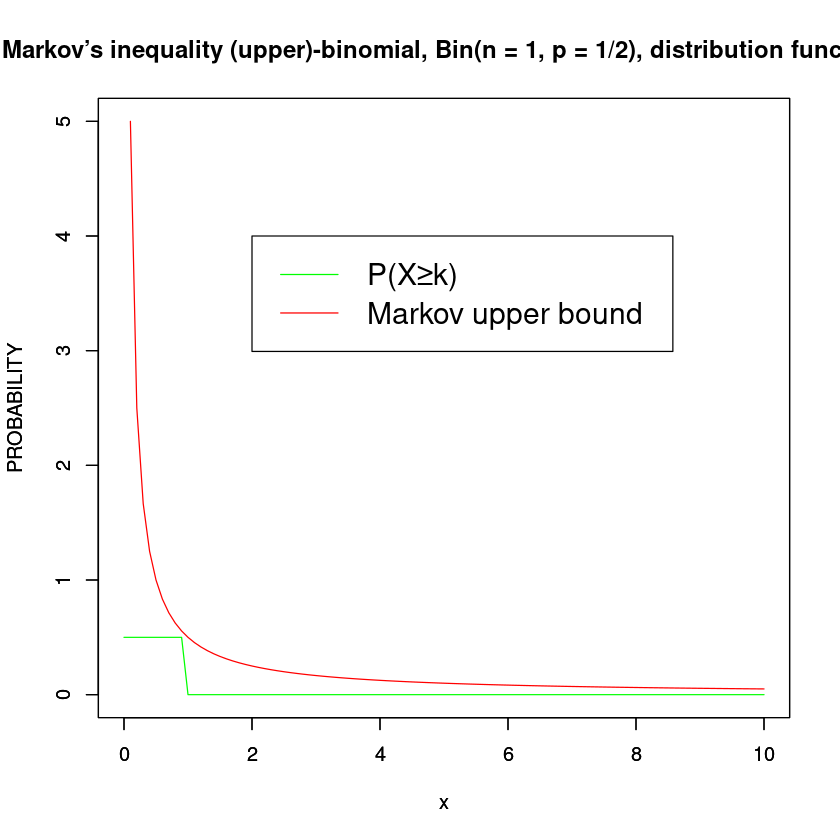

In [83]:
n <- 1
p <- 1/2
E <- n*p  ## E[X]= np 

Mar_upper_bound <- function(k){
    return(E/k)  ## upper bound for: P(X≥k) =  1- P(k≤X)
}

first_inequality <- function(k){ ## P(X≥k) =  1- P(k≤X)
    return(1-pbinom(k,size=n,prob=p)) 
}


plot(Mar_upper_bound, type="l", col="red", lty=1, xlim=c(0,10),ylim=c(0,5),ylab="PROBABILITY" )
par(new=TRUE)
plot(first_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(0,5), ylab="PROBABILITY",
     main = sprintf ("Markov’s inequality (upper)-binomial, Bin(n = 1, p = 1/2), distribution function"))
legend(2,4,c('P(X≥k)','Markov upper bound'), col=c('green','red'),lty=1,cex=1.5)

In [1]:
?qpois()

#### d) a Poisson, Pois(λ = 1/2), distribution function

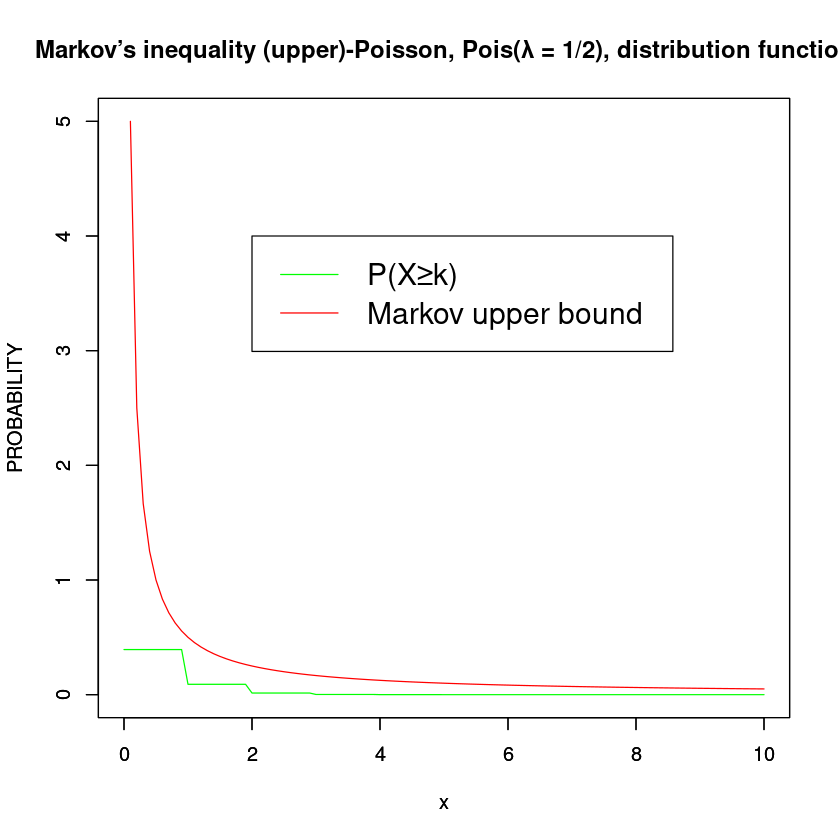

In [84]:
lamda <- 1/2 
E <- lamda  ## E[X]= λ 

Mar_upper_bound <- function(k){
    return(E/k)  ## upper bound for: P(X≥k) =  1- P(k≤X)
}

first_inequality <- function(k){ ## P(X≥k) =  1- P(k≤X)
    return(1-ppois(k,lambda=lamda)) 
}


plot(Mar_upper_bound, type="l", col="red", lty=1, xlim=c(0,10),ylim=c(0,5),ylab="PROBABILITY" )
par(new=TRUE)
plot(first_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(0,5), ylab="PROBABILITY",
     main = sprintf ("Markov’s inequality (upper)-Poisson, Pois(λ = 1/2), distribution function"))
legend(2,4,c('P(X≥k)','Markov upper bound'), col=c('green','red'),lty=1,cex=1.5)

## Exercise 3 - Chebyshev’s inequality
#### • Chebyshev’s inequality tell us that
$$
P(|X − µ|≥ kσ) ≤ \frac{1}{k^2}
$$
#### • which can also be written as
$$
P(|X − µ|< kσ) ≥ 1-\frac{1}{k^2}
$$
#### • use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the following distributions:

In [10]:
che_upper_bound <- function(k){
    return(1/k**2)  ## upper bound for: P(|X-µ|≥kσ) = P(X≥kσ+µ and -kσ+µ≤X) 
}

che_lower_bound <- function(k){ 
    return(1-(1/k**2))  ## lower bound for : P(|X-µ|<kσ) = P(-kσ+µ ≤ X ≤ kσ+µ) 
}

#### a) a normal distribution, N(µ = 3, σ = 5)

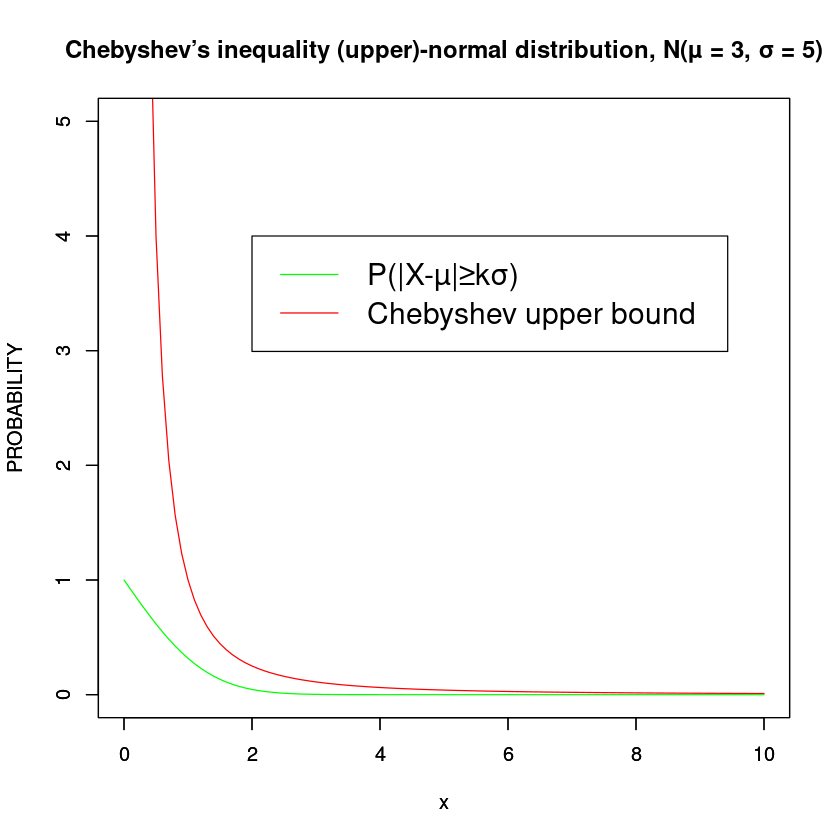

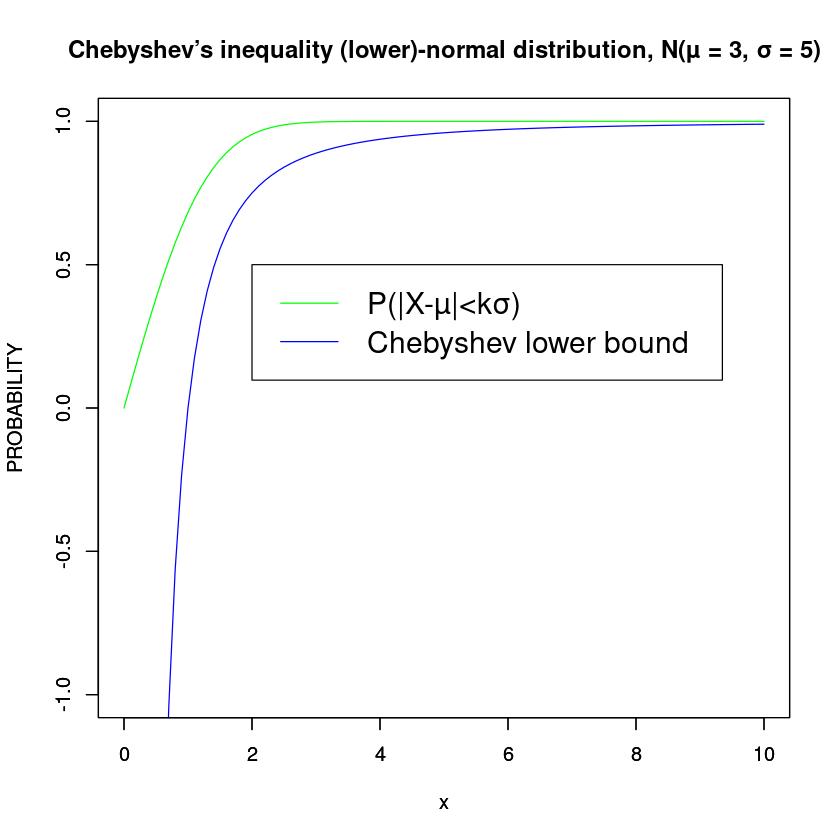

In [87]:
sigma <- 5
mu <- 3

first_inequality <- function(k){ ## P(X≥kσ+µ and -kσ+µ≤X) = P(X≥kσ+µ) + P(-kσ+µ≤X) = 1- P(kσ+µ≤X) + P(-kσ+µ≤X)
    return(1-pnorm(k*sigma+mu,mean=mu,sd=sigma)+pnorm(mu-k*sigma,mean=mu,sd=sigma)) 
}

second_inequality <- function(k){ ## P(-kσ+µ ≤ X ≤ kσ+µ) = P(X≤kσ+µ) - P(-kσ+µ≤X) 
    return(pnorm(k*sigma+mu,mean=mu,sd=sigma)-pnorm(mu-k*sigma,mean=mu,sd=sigma)) 
}


plot(che_upper_bound, type="l", col="red", lty=1, xlim=c(0,10),ylim=c(0,5),ylab="PROBABILITY" )
par(new=TRUE)
plot(first_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(0,5), ylab="PROBABILITY",
     main = sprintf ("Chebyshev’s inequality (upper)-normal distribution, N(µ = 3, σ = 5)"))
legend(2,4,c('P(|X-µ|≥kσ)','Chebyshev upper bound'), col=c('green','red'),lty=1,cex=1.5)


plot(che_lower_bound, type="l", col="blue", lty=1, xlim=c(0,10),ylim=c(-1,1),ylab="PROBABILITY" )
par(new=TRUE)
plot(second_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(-1,1), ylab="PROBABILITY",
     main = sprintf ("Chebyshev’s inequality (lower)-normal distribution, N(µ = 3, σ = 5)"))
legend(2,0.5,c('P(|X-µ|<kσ)','Chebyshev lower bound'), col=c('green','blue'),lty=1,cex=1.5)



#### b) an exponential distribution, Exp(λ = 1)

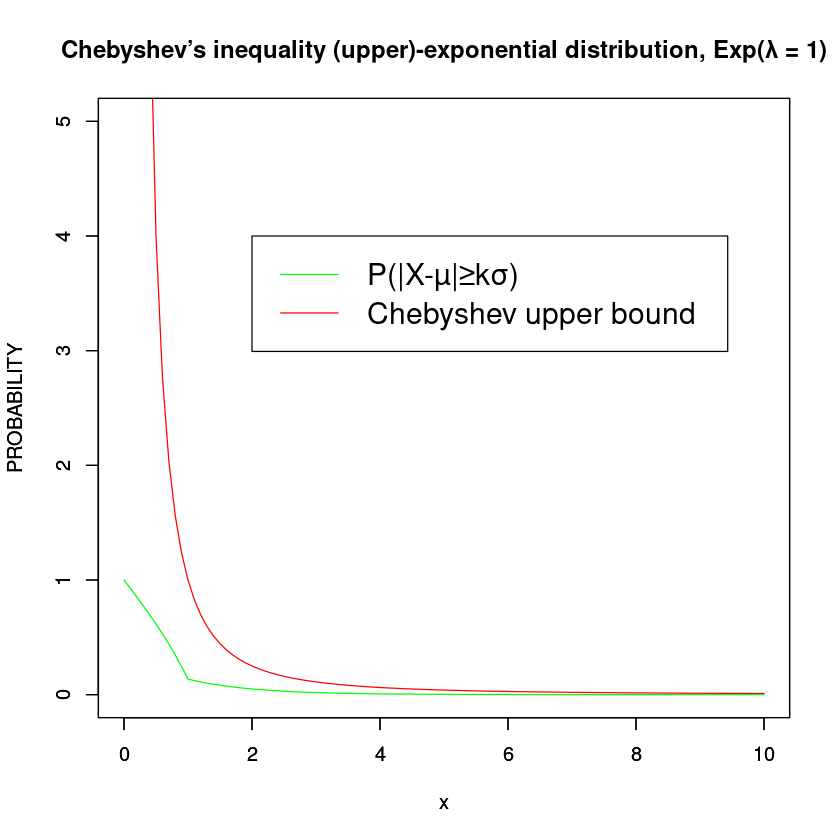

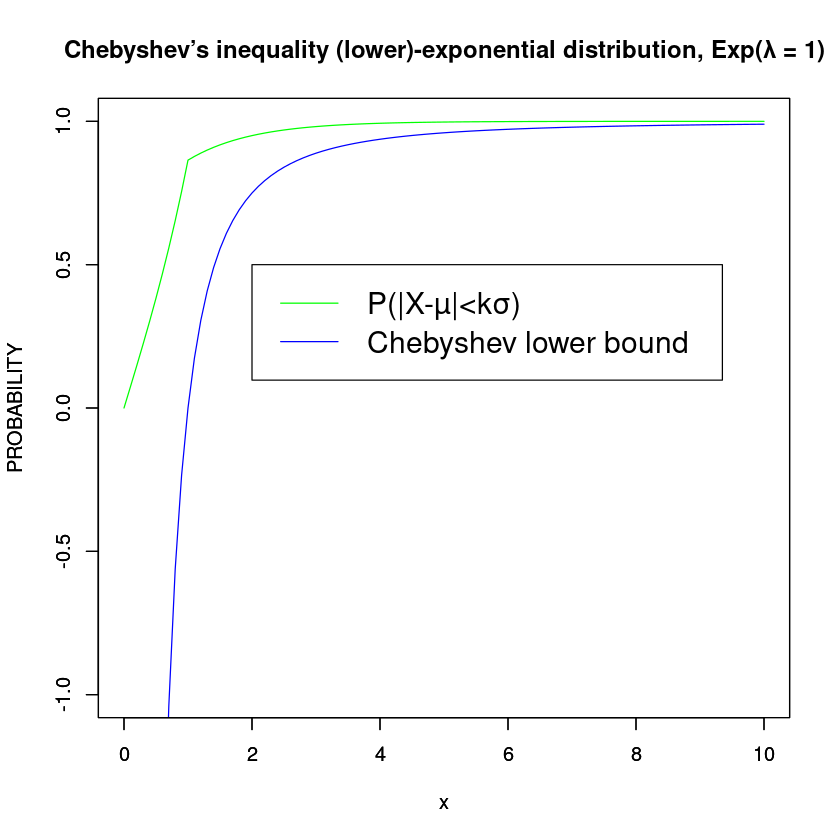

In [88]:
lamda <- 1  
sigma <- sqrt(1/(lamda**2)) ## sqrt(variance)= sqrt(1/λ**2)  
mu <- 1/lamda  ## mean= 1/λ 

first_inequality <- function(k){ ## P(X≥kσ+µ and -kσ+µ≤X) = P(X≥kσ+µ) + P(-kσ+µ≤X) = 1- P(kσ+µ≤X) + P(-kσ+µ≤X)
    return(1-pexp(k*sigma+mu,rate=lamda)+pexp(mu-k*sigma,rate=lamda)) 
}

second_inequality <- function(k){ ## P(-kσ+µ ≤ X ≤ kσ+µ) = P(X≤kσ+µ) - P(-kσ+µ≤X) 
    return(pexp(k*sigma+mu,rate=1)-pexp(mu-k*sigma,rate=1)) 
}


plot(che_upper_bound, type="l", col="red", lty=1, xlim=c(0,10),ylim=c(0,5),ylab="PROBABILITY" )
par(new=TRUE)
plot(first_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(0,5), ylab="PROBABILITY",
     main = sprintf ("Chebyshev’s inequality (upper)-exponential distribution, Exp(λ = 1)"))
legend(2,4,c('P(|X-µ|≥kσ)','Chebyshev upper bound'), col=c('green','red'),lty=1,cex=1.5)


plot(che_lower_bound, type="l", col="blue", lty=1, xlim=c(0,10),ylim=c(-1,1),ylab="PROBABILITY" )
par(new=TRUE)
plot(second_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(-1,1), ylab="PROBABILITY",
     main = sprintf ("Chebyshev’s inequality (lower)-exponential distribution, Exp(λ = 1)"))
legend(2,0.5,c('P(|X-µ|<kσ)','Chebyshev lower bound'), col=c('green','blue'),lty=1,cex=1.5)

#### c) a uniform distribution $U(1-\sqrt{2},1+\sqrt{2})$

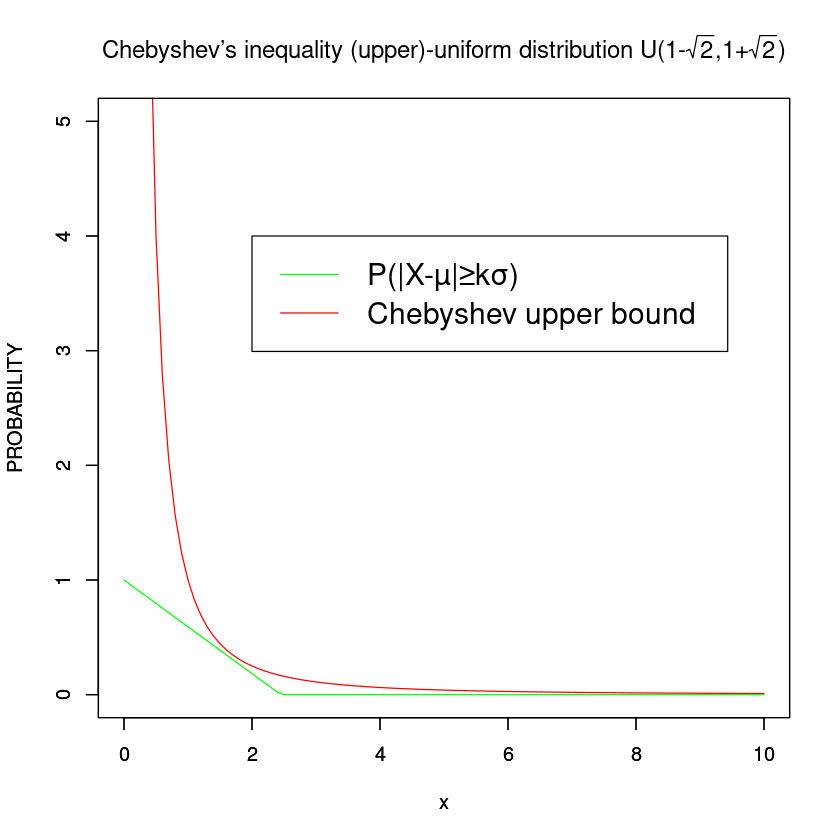

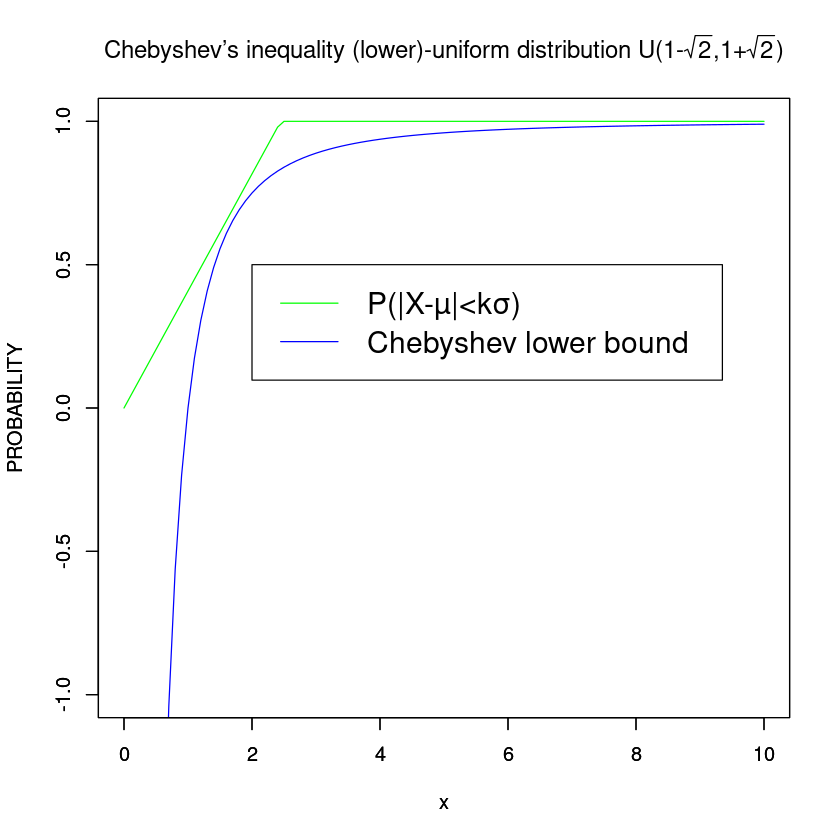

In [89]:
a <- 1-sqrt(2)
b <- 1+sqrt(2)

sigma <- sqrt(((a+b)**2)/12) ## sqr(variance)= sqrt((a+b)**2/12) 
mu <- (a+b)/2 ## mean= (a+b)/2 

first_inequality <- function(k){ ## P(X≥kσ+µ and -kσ+µ≤X) = P(X≥kσ+µ) + P(-kσ+µ≤X) = 1- P(kσ+µ≤X) + P(-kσ+µ≤X)
    return(1-punif(k*sigma+mu,min=a,max=b)+punif(mu-k*sigma,min=a,max=b)) 
}

second_inequality <- function(k){ ## P(-kσ+µ ≤ X ≤ kσ+µ) = P(X≤kσ+µ) - P(-kσ+µ≤X) 
    return(punif(k*sigma+mu,min=a,max=b)-punif(mu-k*sigma,min=a,max=b)) 
}

U <- expression(sqrt(2))

plot(che_upper_bound, type="l", col="red", lty=1, xlim=c(0,10),ylim=c(0,5),ylab="PROBABILITY" )
par(new=TRUE)
plot(first_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(0,5), ylab="PROBABILITY",
    main= expression(paste("Chebyshev’s inequality (upper)-uniform distribution ",
                           "U(1-", sqrt(2),",1+",sqrt(2),")")))
legend(2,4,c('P(|X-µ|≥kσ)','Chebyshev upper bound'), col=c('green','red'),lty=1,cex=1.5)


plot(che_lower_bound, type="l", col="blue", lty=1, xlim=c(0,10),ylim=c(-1,1),ylab="PROBABILITY" )
par(new=TRUE)
plot(second_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(-1,1), ylab="PROBABILITY",
    main= expression(paste("Chebyshev’s inequality (lower)-uniform distribution ",
                           "U(1-", sqrt(2),",1+",sqrt(2),")")))
legend(2,0.5,c('P(|X-µ|<kσ)','Chebyshev lower bound'), col=c('green','blue'),lty=1,cex=1.5)

#### d) a Poisson, Pois(λ = 1/3), distribution function

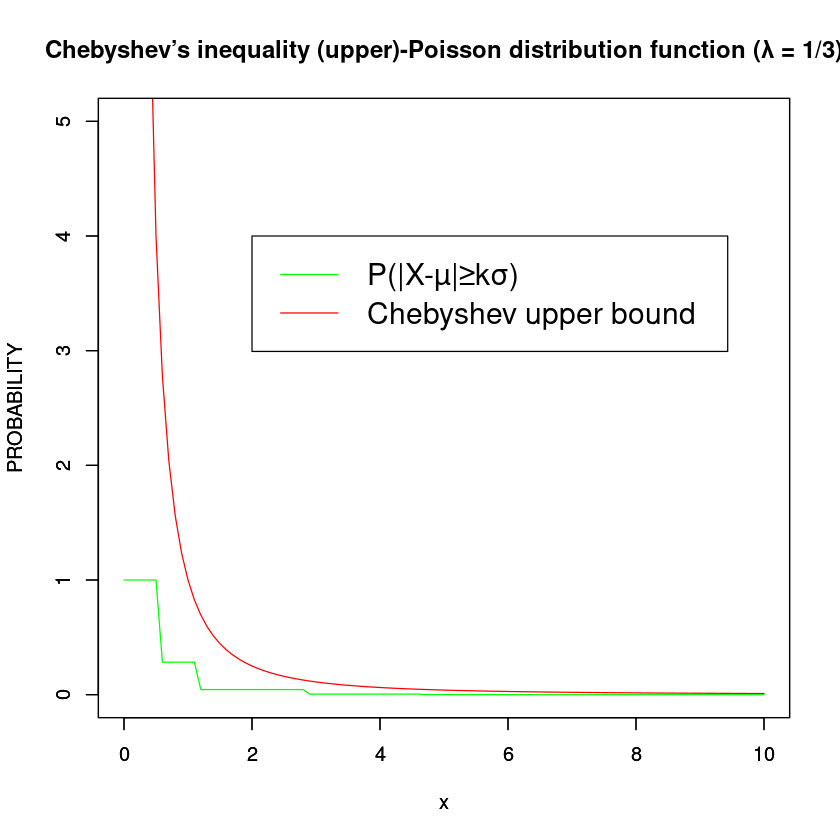

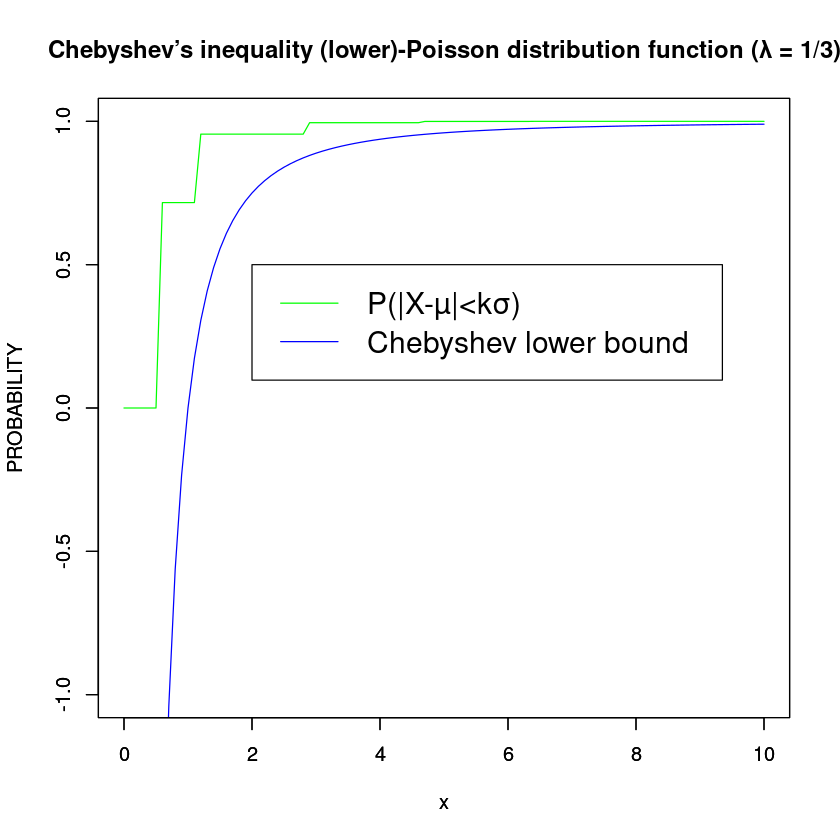

In [90]:
lamda <- 1/3
sigma <- sqrt(lamda) ## sqrt(variance)= sqrt(λ)  
mu <- lamda  ## mean= λ 

first_inequality <- function(k){ ## P(X≥kσ+µ and -kσ+µ≤X) = P(X≥kσ+µ) + P(-kσ+µ≤X) = 1- P(kσ+µ≤X) + P(-kσ+µ≤X)
    return(1-ppois(k*sigma+mu,lambda=lamda)+ppois(mu-k*sigma,lambda=lamda)) 
}

second_inequality <- function(k){ ## P(-kσ+µ ≤ X ≤ kσ+µ) = P(X≤kσ+µ) - P(-kσ+µ≤X) 
    return(ppois(k*sigma+mu,lambda=lamda)-ppois(mu-k*sigma,lambda=lamda)) 
}


plot(che_upper_bound, type="l", col="red", lty=1, xlim=c(0,10),ylim=c(0,5),ylab="PROBABILITY" )
par(new=TRUE)
plot(first_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(0,5), ylab="PROBABILITY",
     main = sprintf ("Chebyshev’s inequality (upper)-Poisson distribution function (λ = 1/3)"))
legend(2,4,c('P(|X-µ|≥kσ)','Chebyshev upper bound'), col=c('green','red'),lty=1,cex=1.5)


plot(che_lower_bound, type="l", col="blue", lty=1, xlim=c(0,10),ylim=c(-1,1),ylab="PROBABILITY" )
par(new=TRUE)
plot(second_inequality, type="l", col="green", lty=1, xlim=c(0,10),ylim=c(-1,1), ylab="PROBABILITY",
     main = sprintf ("Chebyshev’s inequality (lower)-Poisson distribution function (λ = 1/3)"))
legend(2,0.5,c('P(|X-µ|<kσ)','Chebyshev lower bound'), col=c('green','blue'),lty=1,cex=1.5)

## Exercise 4 - Six Boxes Toy Model : inference
#### • The six boxes toy model is described in reference [1].
#### • Labeling the boxes as follows:
#### H0= (5 black , 0 white)      H1= (4 black , 1 white) H2= (3 black , 2 white)      H3= (2 black , 2 white) H4= (1 black , 4 white)      H5= (0 black , 5 white)
#### • write a program in R that:
#### 1) allows the user to insert the color of a randomly extracted box and
##### 3) prints on the standard output the probability of selecting each box
##### 4) plots the probability for each box as a function of the extraction step

In [26]:
pw <- c(0,1/5,2/5,3/5,4/5,1) # P(E_W(n)|Hj) = j/5
pb <- c(1,4/5,3/5,2/5,1/5,0) # P(E_B(n)|Hj) = (5-j)/5

six_BTM <- data.frame(
    Trial = numeric(),
    color = character(),
    H0 = numeric(),
    H1 = numeric(),
    H2 = numeric(),
    H3 = numeric(),
    H4 = numeric(),
    H5 = numeric(),
    stringsAsFactors = FALSE)
six_BTM[1,] <- list(0,"-",0.167,0.167,0.167,0.167,0.167,0.167) #first row (befor exprience and without information)
                                                               # P(Hj|I)
counter <- 1 ##for define the row in dataframe

In [27]:
sBTM_f <- function(s){
    
    if (reset==0){ ## reset=0 means continue the experiment
        p <- c() ## for saving the new probabilities
    if (s==1){ ## if color is white
        sum <- sum(six_BTM[counter,c(3:8)]*pw) ## sum(P(Hj|I) P(E_W(n)|Hj))
        for (i in 1:6){
            p[i]<- (pw[i]*six_BTM[counter,c(i+2)])/sum ## P(Ej_W(n)|Hj) P(Hj|I)/ sum
            color <- "W"
        }    
        }

    if (s==0){ ## if color is black
        sum <- sum(six_BTM[counter,c(3:8)]*pb)
        for (i in 1:6){
            p[i]<- (pb[i]*six_BTM[counter,c(i+2)])/sum
            color <- "B"  
        }    
        }    
    six_BTM[counter+1,] <- list(counter, color,p[1],p[2],p[3],p[4],p[5],p[6] )
    return(six_BTM)
    }
    
    if (reset==1){ ## reset=1 means new expriment
        six_BTM <- data.frame(
            Trial = numeric(),
            color = character(),
            H0 = numeric(),
            H1 = numeric(),
            H2 = numeric(),
            H3 = numeric(),
            H4 = numeric(),
            H5 = numeric(),
            stringsAsFactors = FALSE)
        six_BTM[1,] <- list(0,"-",0.167,0.167,0.167,0.167,0.167,0.167)
        
        p <- c()
        if (s==1){
            sum <- sum(six_BTM[counter,c(3:8)]*pw)
            for (i in 1:6){
                p[i]<- (pw[i]*six_BTM[counter,c(i+2)])/sum
                color <- "W"
            }    
            }

        if (s==0){
            sum <- sum(six_BTM[counter,c(3:8)]*pb)
            for (i in 1:6){
                p[i]<- (pb[i]*six_BTM[counter,c(i+2)])/sum
                color <- "B"  
            }    
            }
        six_BTM[counter+1,] <- list(counter, color,p[1],p[2],p[3],p[4],p[5],p[6] )
        return(six_BTM)
    }
    
}

Please enter the code of stone's color Wite=1 or Black=0: 0


,Trial,color,H0,H1,H2,H3,H4,H5
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-,0.1670000,0.1670000,0.16700000,0.167000000,1.670000e-01,0.167
2,1,B,0.3333333,0.2666667,0.20000000,0.133333333,6.666667e-02,0.000
3,2,B,0.4545455,0.2909091,0.16363636,0.072727273,1.818182e-02,0.000
4,3,B,0.5555556,0.2844444,0.12000000,0.035555556,4.444444e-03,0.000
5,4,B,0.6384065,0.2614913,0.08273749,0.016343207,1.021450e-03,0.000
6,5,B,0.7062147,0.2314124,0.05491525,0.007231638,2.259887e-04,0.000
7,6,B,0.7616378,0.1996588,0.03553497,0.003119669,4.874482e-05,0.000
8,7,B,0.8068681,0.1692125,0.02258714,0.001321973,1.032791e-05,0.000


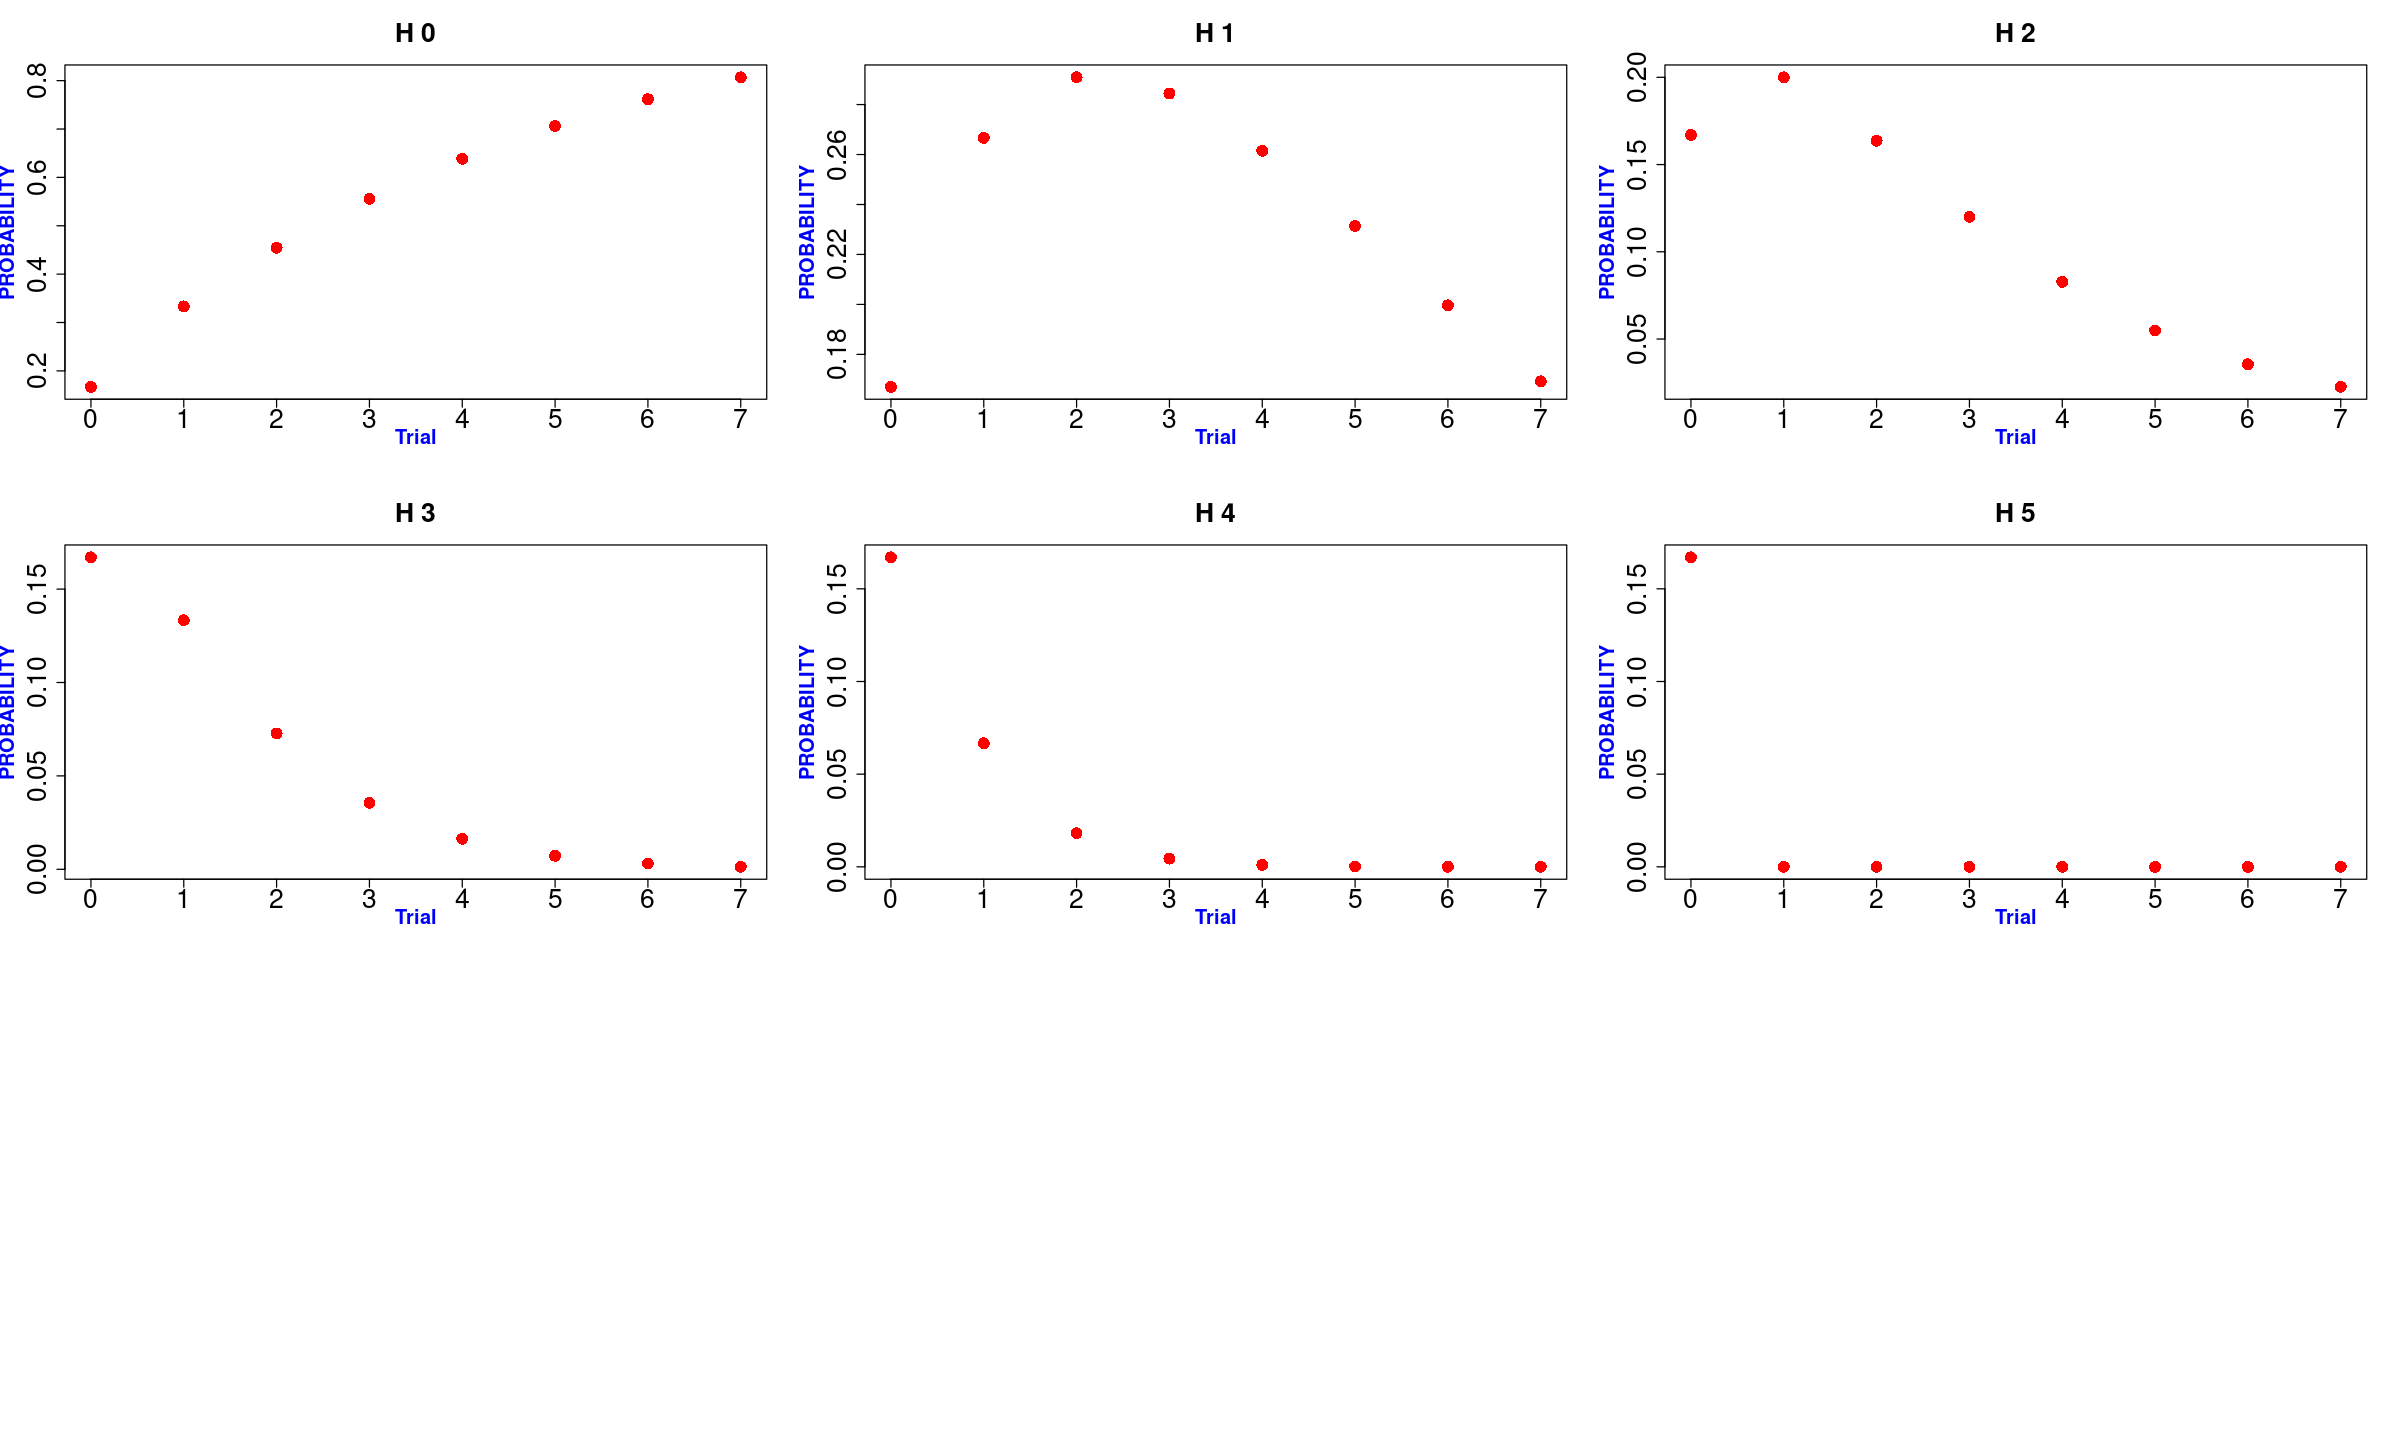

In [34]:
reset <- 0 # if you want to run new expriment change it to 1 and agane put it 0

if (reset==1){
    counter <- 1 ## if we want new expriment we need to reset the counter
}

s<-readline(prompt="Please enter the code of stone's color Wite=1 or Black=0: ") 
six_BTM<-sBTM_f(s)
counter <- counter+1
six_BTM

par(mfrow=c(3,3))

for (i in 0:5){
    plot(six_BTM[,1],six_BTM[,i+3],pch = 16,col="red", ylab="",xlab="",
         main = paste ("H",i),cex=2, cex.main=2,cex.axis=2)
    mtext(side=1, line=2, "Trial", col="blue", font=2,cex=1)
    mtext(side=2, line=3, "PROBABILITY", col="blue", font=2,cex=1)
}
options(repr.plot.width=20,repr.plot.height=12)

## Exercise 5 - Six Boxes Toy Model : simulation
##### • consider again the six boxes toy model of the previous exercise and write a simulation program that:
#### 1) selects a random box
#### 2) makes random sampling from the box
#### 3) prints on the standard output the probability of selecting each box
#### 4) plots the probability for each box as a function of the number of trial

In [39]:
sBTM_f_simulation <- function(s){
    
    p <- c()## for saving the new probabilities
    if (s==1){ ## if color is white
        sum <- sum(six_BTM_simulation[counter,c(3:8)]*pw) ## sum(P(Hj|I) P(E_W(n)|Hj))
        for (i in 1:6){
            p[i]<- (pw[i]*six_BTM_simulation[counter,c(i+2)])/sum  ## P(Ej_W(n)|Hj) P(Hj|I)/ sum
            color <- "W"
        }    
        }

    if (s==0){ ## if color is black
        sum <- sum(six_BTM_simulation[counter,c(3:8)]*pb)
        for (i in 1:6){
            p[i]<- (pb[i]*six_BTM_simulation[counter,c(i+2)])/sum
            color <- "B"  
        }    
        }    
    six_BTM_simulation[counter+1,] <- list(counter, color,p[1],p[2],p[3],p[4],p[5],p[6] )
    return(six_BTM_simulation)
    }

Please enter the number of simulation's trial: 40


,Trial,color,H0,H1,H2,H3,H4,H5
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-,0.167,1.670000e-01,0.1670000000,0.16700000,0.1670000,0.1670000
2,1,W,0.000,6.666667e-02,0.1333333333,0.20000000,0.2666667,0.3333333
3,2,W,0.000,1.818182e-02,0.0727272727,0.16363636,0.2909091,0.4545455
4,3,W,0.000,4.444444e-03,0.0355555556,0.12000000,0.2844444,0.5555556
5,4,B,0.000,2.739726e-02,0.1643835616,0.36986301,0.4383562,0.0000000
6,5,W,0.000,8.510638e-03,0.1021276596,0.34468085,0.5446809,0.0000000
7,6,W,0.000,2.484472e-03,0.0596273292,0.30186335,0.6360248,0.0000000
8,7,W,0.000,6.956522e-04,0.0333913043,0.25356522,0.7123478,0.0000000
9,8,W,0.000,1.891611e-04,0.0181594628,0.20684763,0.7748037,0.0000000


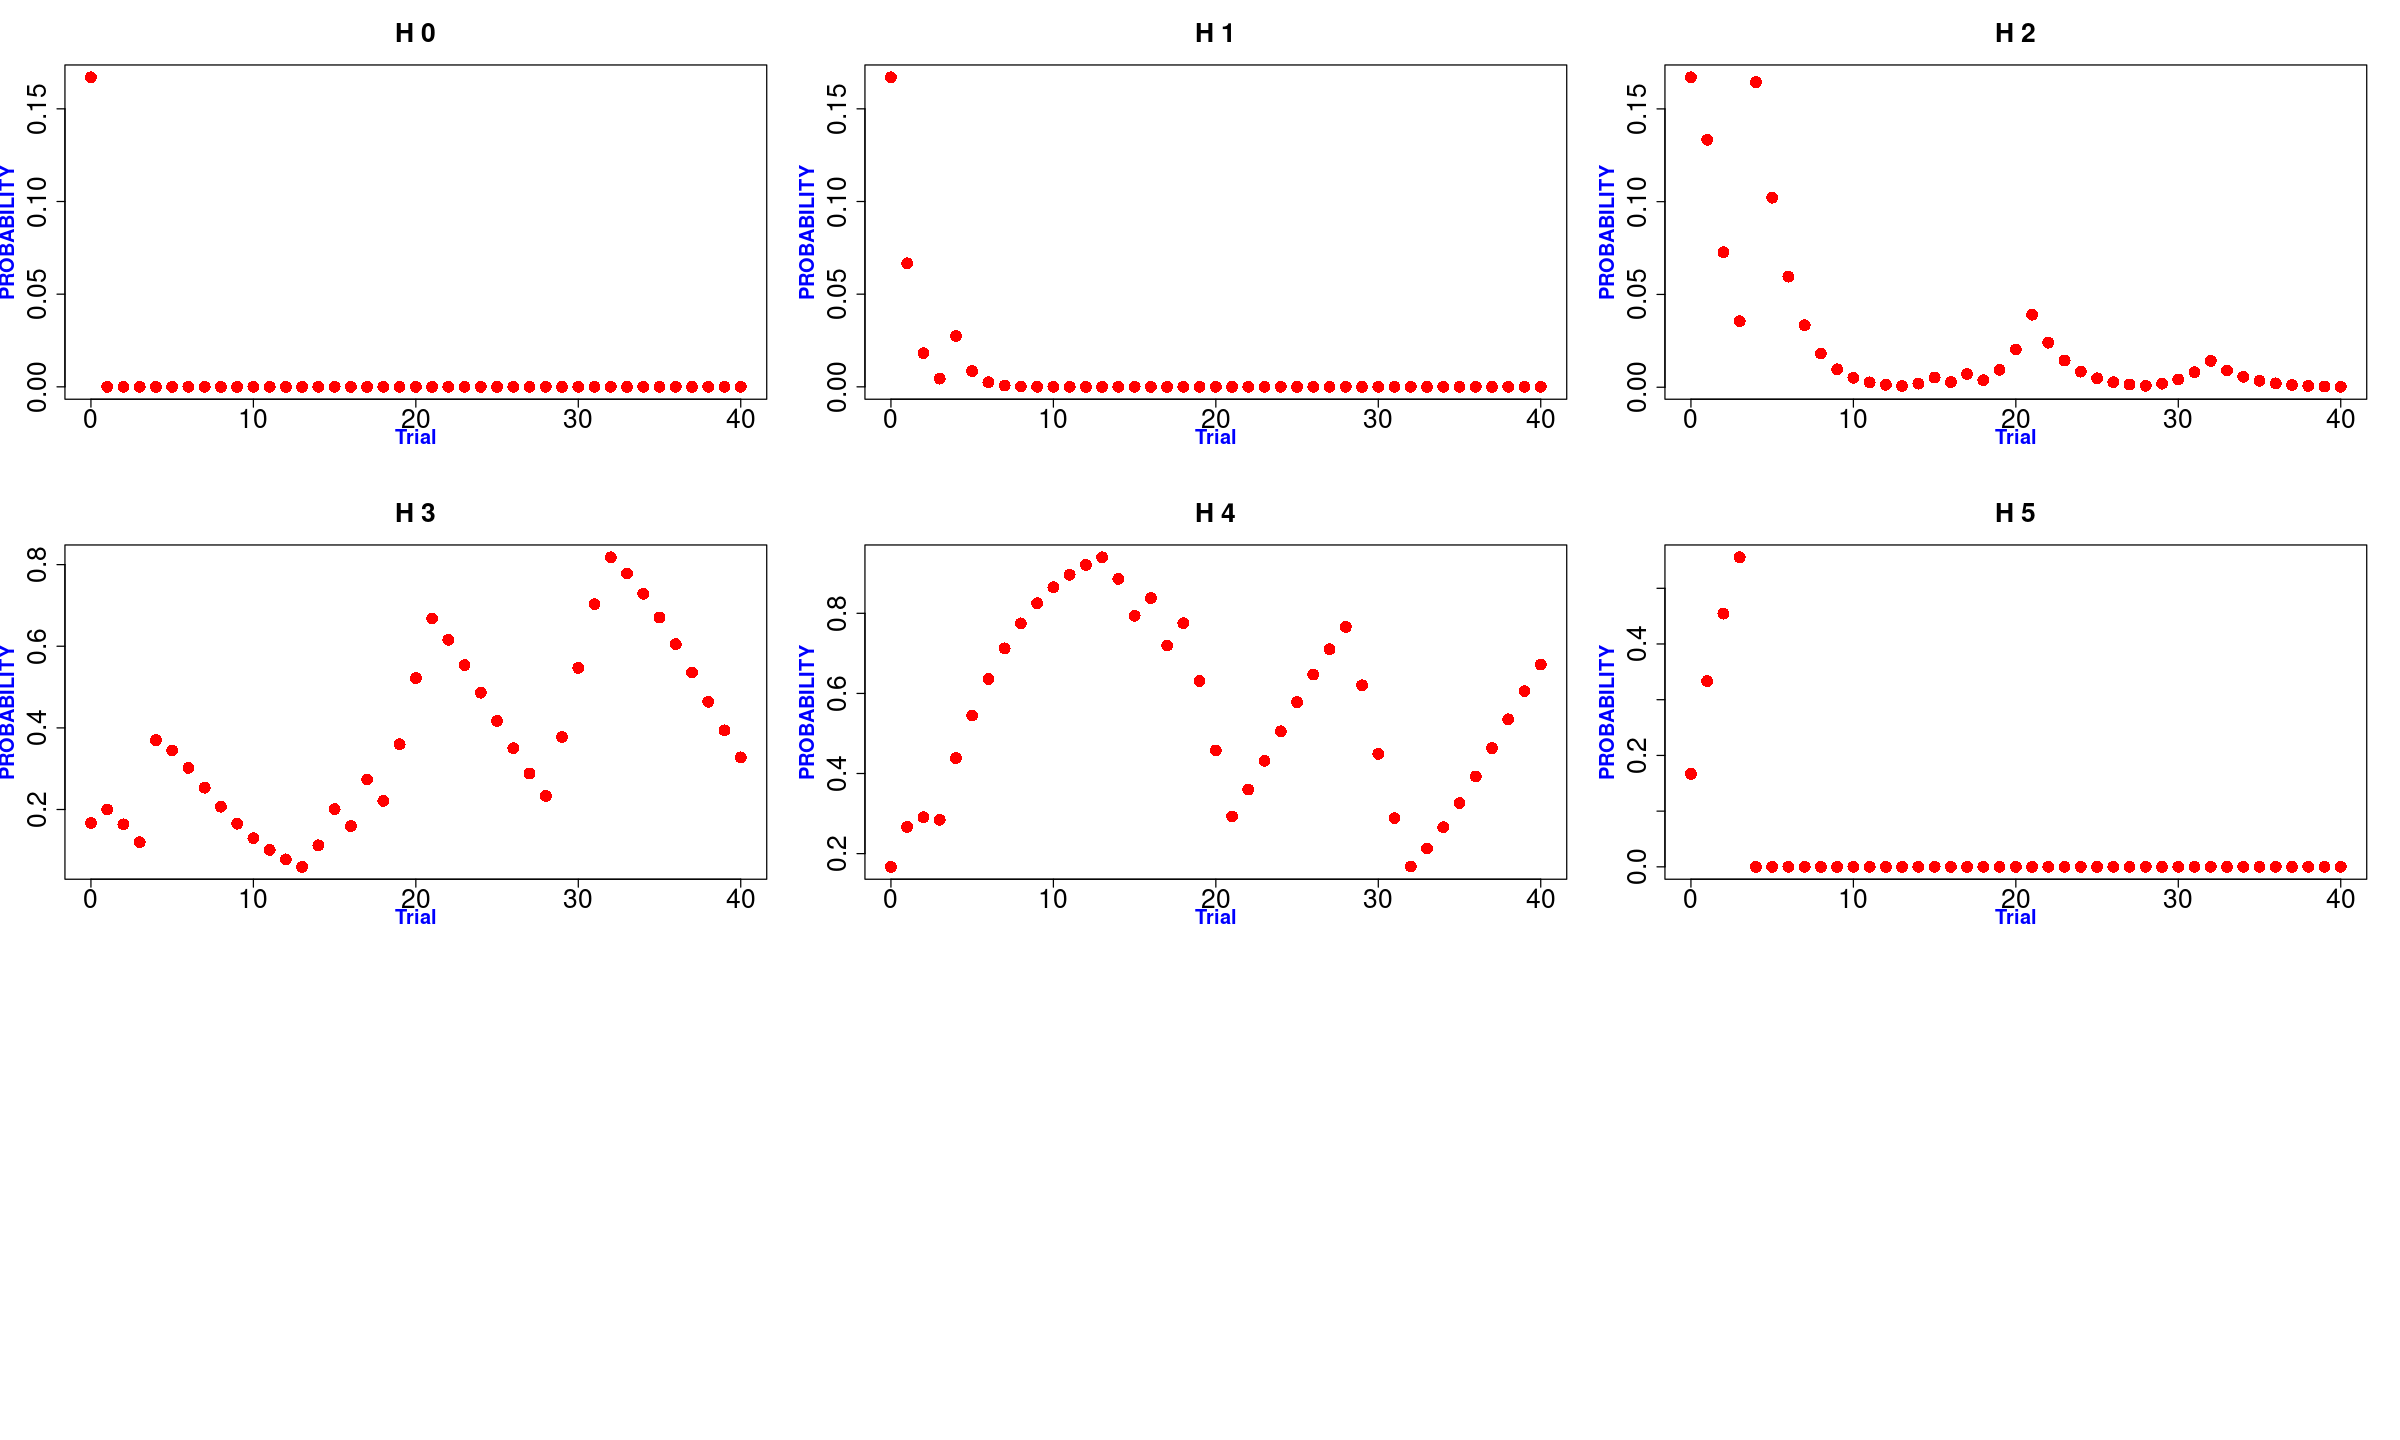

In [40]:
number_Trial <- readline(prompt="Please enter the number of simulation's trial: ") 

pw <- c(0,1/5,2/5,3/5,4/5,1) # P(E_W(n)|Hj) = j/5
pb <- c(1,4/5,3/5,2/5,1/5,0) # P(E_B(n)|Hj) = (5-j)/5

six_BTM_simulation <- data.frame(
    Trial = numeric(),
    color = character(),
    H0 = numeric(),
    H1 = numeric(),
    H2 = numeric(),
    H3 = numeric(),
    H4 = numeric(),
    H5 = numeric(),
    stringsAsFactors = FALSE)
six_BTM_simulation[1,] <- list(0,"-",0.167,0.167,0.167,0.167,0.167,0.167) 
                                                          #first row (befor exprience and without information)
counter <- 1  ##for define the row in dataframe


BOXES <- list () ## define the boxes
BOXES[[1]] <- c(0,0,0,0,0)
BOXES[[2]] <- c(0,0,0,0,1)
BOXES[[3]] <- c(0,0,0,1,1)
BOXES[[4]] <- c(0,0,1,1,1)
BOXES[[5]] <- c(0,1,1,1,1)
BOXES[[6]] <- c(1,1,1,1,1)

select_box <- sample(1:6, 1, replace=T) ## select box randomly

for (i in 1:number_Trial){
    ampling_box <- sample(1:5, 1, replace=T) ## select the stone randomly
    six_BTM_simulation<-sBTM_f_simulation(BOXES[[select_box]][sampling_box])
    counter <- counter+1    
}

six_BTM_simulation

par(mfrow=c(3,3))

for (i in 0:5){
    plot(six_BTM_simulation[,1],six_BTM_simulation[,i+3],pch = 16,col="red", ylab="",xlab="",
         main = paste ("H",i),cex=2, cex.main=2,cex.axis=2)
    mtext(side=1, line=2, "Trial", col="blue", font=2,cex=1)
    mtext(side=2, line=3, "PROBABILITY", col="blue", font=2,cex=1)
}
options(repr.plot.width=20,repr.plot.height=12)
